In [9]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display


In [10]:
# Step 1: Generate the data
num_points = 1000
x_values = np.linspace(0, 4 * np.pi, num_points)
y_values = np.sin(x_values)

# Convert to PyTorch tensors
x_tensor = torch.tensor(x_values, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y_values, dtype=torch.float32).view(-1, 1)


In [11]:
# Step 2: Randomly sample 100 points for training
num_samples = 900
indices = np.random.choice(range(num_points), num_samples, replace=False)
x_train = x_tensor[indices]
y_train = y_tensor[indices]

# Step 3: Set aside the rest for testing
test_indices = np.setdiff1d(range(num_points), indices)
x_test = x_tensor[test_indices]
y_test = y_tensor[test_indices]



In [12]:
# Step 4: Define a two-layer neural network
class TwoLayerNet(nn.Module):
    def __init__(self):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(1, 10)  # First layer with 10 neurons
        self.fc2 = nn.Linear(10, 12)  # Second layer 
        self.fc3 = nn.Linear(12,15)  # third layer 
        self.fc4 = nn.Linear(15,13)  # fourth layer 
        self.fc5 = nn.Linear(13,12)  # fith layer
        self.fc6 = nn.Linear(12,15)  # sixth layer
        self.fc7 = nn.Linear(15,18)  # seventh layer
        self.fc8 = nn.Linear(18,17)  # eighth layer
        self.fc9 = nn.Linear(17,19)  # nineth layer
        self.fc10 = nn.Linear(19,13) # tenth layer
        self.fc11 = nn.Linear(13,20) #eleventh  
        self.fc12 = nn.Linear(20,15) 
        self.fc13 = nn.Linear(15,8)   
        self.fc14 = nn.Linear(8,6)   
        self.fc15 = nn.Linear(6,9)   
        self.fc16 = nn.Linear(9,11)   
        self.fc17 = nn.Linear(11,13)   
        self.fc18 = nn.Linear(13,5)
        self.fc19 = nn.Linear(5,16)   
        self.fc20 = nn.Linear(16,1)   




    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))  # Activation function for the first layer
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        x = torch.sigmoid(self.fc5(x))
        x = torch.sigmoid(self.fc6(x))
        x = torch.sigmoid(self.fc7(x))
        x = torch.sigmoid(self.fc8(x))
        x = torch.sigmoid(self.fc9(x))
        x = torch.sigmoid(self.fc10(x))
        x = torch.sigmoid(self.fc11(x))
        x = torch.sigmoid(self.fc12(x))
        x = torch.sigmoid(self.fc13(x))
        x = torch.sigmoid(self.fc14(x))
        x = torch.sigmoid(self.fc15(x))
        x = torch.sigmoid(self.fc16(x))
        x = torch.sigmoid(self.fc17(x))
        x = torch.sigmoid(self.fc18(x))
        x = torch.sigmoid(self.fc19(x))

        x= self.fc20(x)
   
        return x

# Initialize the network
net = TwoLayerNet()

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)


Epoch [100/1000], Loss: 0.5044
Epoch [200/1000], Loss: 0.5044
Epoch [300/1000], Loss: 0.5044
Epoch [400/1000], Loss: 0.5044
Epoch [500/1000], Loss: 0.5044
Epoch [600/1000], Loss: 0.5044
Epoch [700/1000], Loss: 0.5044
Epoch [800/1000], Loss: 0.5044
Epoch [900/1000], Loss: 0.5044
Epoch [1000/1000], Loss: 0.5044


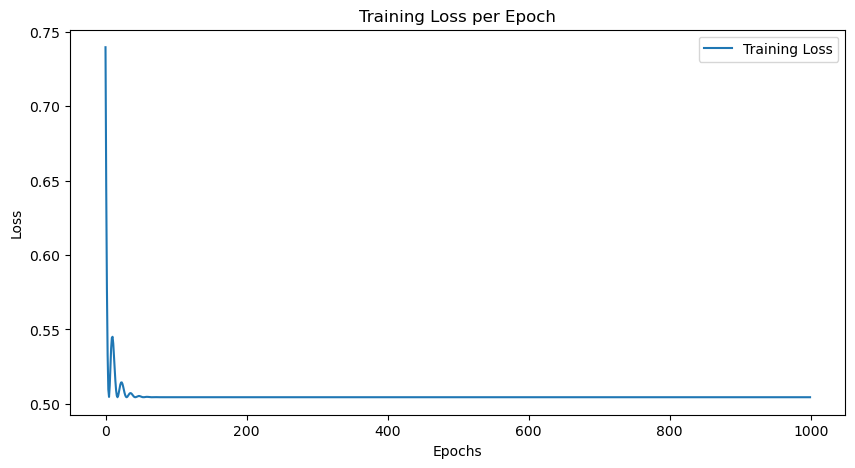

In [13]:
# Step 5: Train the neural network
epochs = 1000
loss_values = []  # List to store loss values

for epoch in range(epochs):
    # Zero the parameter gradients
    optimizer.zero_grad()
    
    # Forward pass
    outputs = net(x_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimize
    loss.backward()
    optimizer.step()
    loss_values.append(loss.item())

    # Print statistics
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
        # Plotting the epochs vs loss
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()
plt.show()
# Evaluate on test data (no gradient needed)
with torch.no_grad():
    y_pred = net(x_test)
#     acc = accuracy_score (y_test,y_pred)


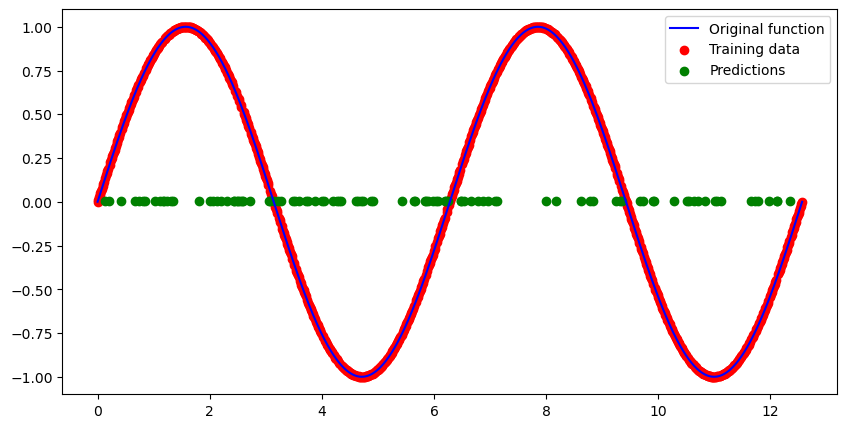

In [14]:
# Step 6: Visualize the results
plt.figure(figsize=(10, 5))

# Plot the original sine function
plt.plot(x_values, y_values,color= 'blue', label="Original function")

# Plot the training data
plt.scatter(x_train.numpy(), y_train.numpy(), color='red', label="Training data")

# Plot the predictions on the test set
plt.scatter(x_test.numpy(), y_pred.numpy(), color='green', label="Predictions")

# Show the plot
plt.legend()
plt.show()


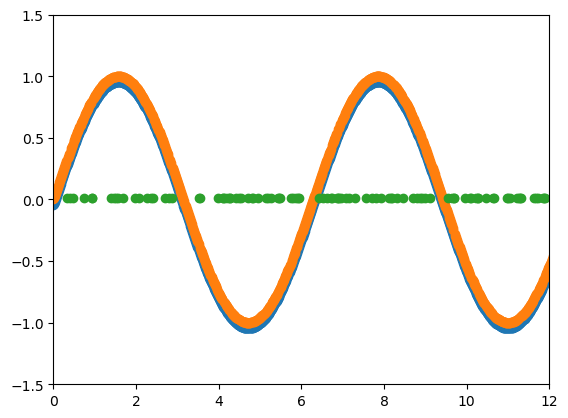

In [20]:

import matplotlib.animation as animation

# Create your three plots (replace with your actual data)


fig, ax = plt.subplots()
ax.set_xlim(0, 12)
ax.set_ylim(-1.5, 1.5)

# Create scatter points for each plot
scat1 = ax.scatter(x_values, y_values, label='Plot 1')
scat2 = ax.scatter(x_train.numpy(), y_train.numpy(), label='Plot 2')
scat3 = ax.scatter(x_test.numpy(), y_pred.numpy(), label='Plot 3')

def animate(i):
    # Update scatter point data for each frame
    scat1.set_offsets(np.column_stack((x_values, y_values + 0.1 * np.sin(i / 10))))
    scat2.set_offsets(np.column_stack((x_train.numpy(),  y_train.numpy())))
    scat3.set_offsets(np.column_stack((x_test.numpy(), y_pred.numpy())))
    return scat1, scat2, scat3

ani = animation.FuncAnimation(fig, animate, repeat=True, frames=100, interval=50)
ani.save('partb plots_animation with 20 layer sample.gif', writer='imagemagick', fps=20)
plt.show()


In [ ]:
net.fc1.weight.size()
# net.fc1.bias.